# Visualización de datos en Python
#### Tablas, histogramas, diagramas de caja y corte para estadísticas

Cuando se trabaja con un nuevo conjunto de datos, una de las cosas más útiles es comenzar a visualizar los datos. Mediante el uso de tablas, histogramas, diagramas de caja y otras herramientas visuales, podemos tener una mejor idea de lo que los datos pueden estar tratando de decirnos y podemos obtener información sobre los datos que quizás no hubiéramos descubierto de otra manera.

Repasaremos cómo realizar algunas visualizaciones básicas en Python y, lo más importante, aprenderemos cómo comenzar a explorar datos desde una perspectiva gráfica.

In [1]:
# We first need to import the packages that we will be using
import seaborn as sns # For plotting
import pandas as pd
import matplotlib.pyplot as plt # For showing plots

# Load in the data set
tips_data = pd.read_csv("Datasets/tips.csv")


#### Visualizing the Data - Tables
When you begin working with a new data set,  it is often best to print out the first few rows before you begin other analysis. This will show you what kind of data is in the dataset, what data types you are working with, and will serve as a reference for the other plots that we are about to make. 

In [2]:
# Print out the first few rows of the data
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Describing Data
Summary statistics, which include things like the mean, min, and max of the data, can be useful to get a feel for how large some of the variables are and what variables may be the most important. 

In [3]:
# Print out the summary statistics for the quantitative variables
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
desc = tips_data['size'].describe()
desc

count    244.000000
mean       2.569672
std        0.951100
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64

In [5]:
tips_data['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [14]:
range_bills = ((tips_data['size']>3) &(tips_data['size']<7))
range_bills 

0      False
1      False
2      False
3      False
4       True
       ...  
239    False
240    False
241    False
242    False
243    False
Name: size, Length: 244, dtype: bool

In [15]:
tips_data1 = tips_data[range_bills] 
tips_data1.head()

,total_bill,tip,sex,smoker,day,time,size
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
13,18.43,3.00,Male,No,Sun,Dinner,4


In [16]:
tips_data1['size'].unique()

array([4, 6, 5])

In [17]:
tips_data1['size'].value_counts()

4    37
5     5
6     4
Name: size, dtype: int64

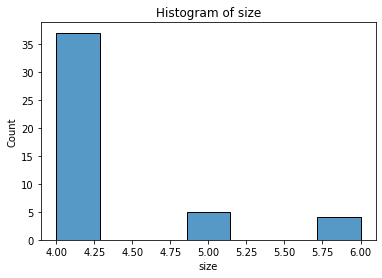

In [18]:
# Plot a histogram of the total bill
sns.histplot(tips_data1["size"], 
             kde = False).set_title("Histogram of size")

plt.show()

In [20]:
tips_data2 = tips_data.loc[range_bills, 'size'] 
tips_data2.head()

4     4
5     4
7     4
11    4
13    4
Name: size, dtype: int64

In [22]:
tips_data3 = tips_data.loc[range_bills, ['size', 'total_bill']] 
tips_data3.head()

,size,total_bill
4,4,24.59
5,4,25.29
7,4,26.88
11,4,35.26
13,4,18.43


In [24]:
#tips_data1['day']
tips_data1

,total_bill,tip,sex,smoker,day,time,size
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
13,18.43,3.00,Male,No,Sun,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
25,17.81,2.34,Male,No,Sat,Dinner,4
31,18.35,2.50,Male,No,Sat,Dinner,4
33,20.69,2.45,Female,No,Sat,Dinner,4
44,30.40,5.60,Male,No,Sun,Dinner,4


In [25]:
prefered_days = ['Sun','Sat' ]
filt = tips_data1['day'].isin(prefered_days)

In [26]:
tips_sun_sat = tips_data1.loc[filt]
tips_sun_sat.head()

,total_bill,tip,sex,smoker,day,time,size
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
13,18.43,3.00,Male,No,Sun,Dinner,4


In [27]:
tips_data1.loc[filt, 'size']

4      4
5      4
7      4
11     4
13     4
23     4
25     4
31     4
33     4
44     4
47     4
52     4
54     4
56     4
59     4
63     4
116    4
153    4
154    4
155    5
156    6
157    4
159    4
160    4
167    4
180    4
183    4
185    5
187    5
207    4
211    4
212    4
216    5
219    4
227    4
230    4
Name: size, dtype: int64

In [28]:
print('='*30,'Good luck!', '='*30)

============================== Good luck! ==============================
